In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10 # Set figure size

from trustworthiness import *
from util import *

### Compute trustworthiness of **sidewalks**

In [7]:
city = 'sea'
trust_s = trustworthiness(sidewalk_qualifier, city)

### Plot distribution

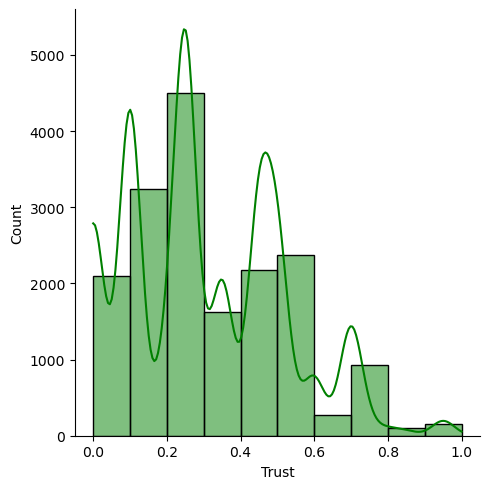

In [11]:
sns.displot(trust_s, x="Trust", kde= True, color = 'green', bins = 10);

### Compute trustworthiness of **highways with sidewalk tags**

In [9]:
city = 'sea'
trust_hwst = trustworthiness(highway_with_sidewalk_tag, city)

### Plot distribution

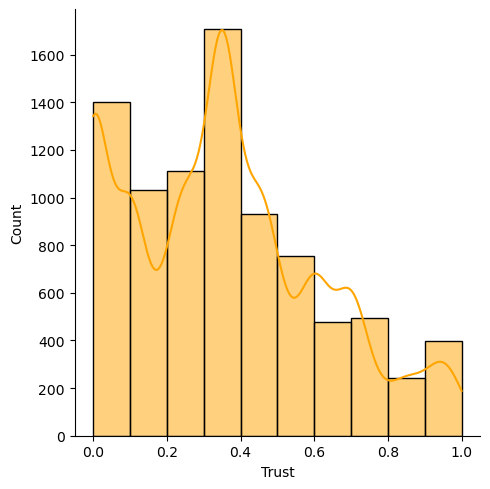

In [10]:
sns.displot(trust_hwst, x="Trust", kde= True, color = 'orange', bins = 10)

### **Geographic plot** of trustworthniess index of sidewalks and highways with sidewalk tag
(Entire city)

Load geometric data of sidewalks, highways with sidewalk tag, and highways

In [3]:
city = 'sea'
l = LatestHandler()
l.read_parsed_data(city)
filtered_s = l.filter_data(sidewalk_qualifier)
filtered_hwst = l.filter_data(highway_with_sidewalk_tag)
filtered_h = l.filter_data(highway_qualifier)
sidewalks = l.get_gdf(filtered_s)[['id', 'tags', 'geometry']]
hwst = l.get_gdf(filtered_hwst)[['id', 'tags', 'geometry']]
highways = l.get_gdf(filtered_h)[['id', 'tags', 'geometry']]
merged = pd.concat([sidewalks, hwst])

Merge geometric data with trustworthiness

In [12]:
trust = pd.concat([trust_s, trust_hwst])[['id', 'Trust']]
result = pd.merge(trust, merged, on="id")[['id', 'Trust', 'tags', 'geometry']]
result = gpd.GeoDataFrame(result, crs="EPSG:4326")

Plot Trustworthiness Index

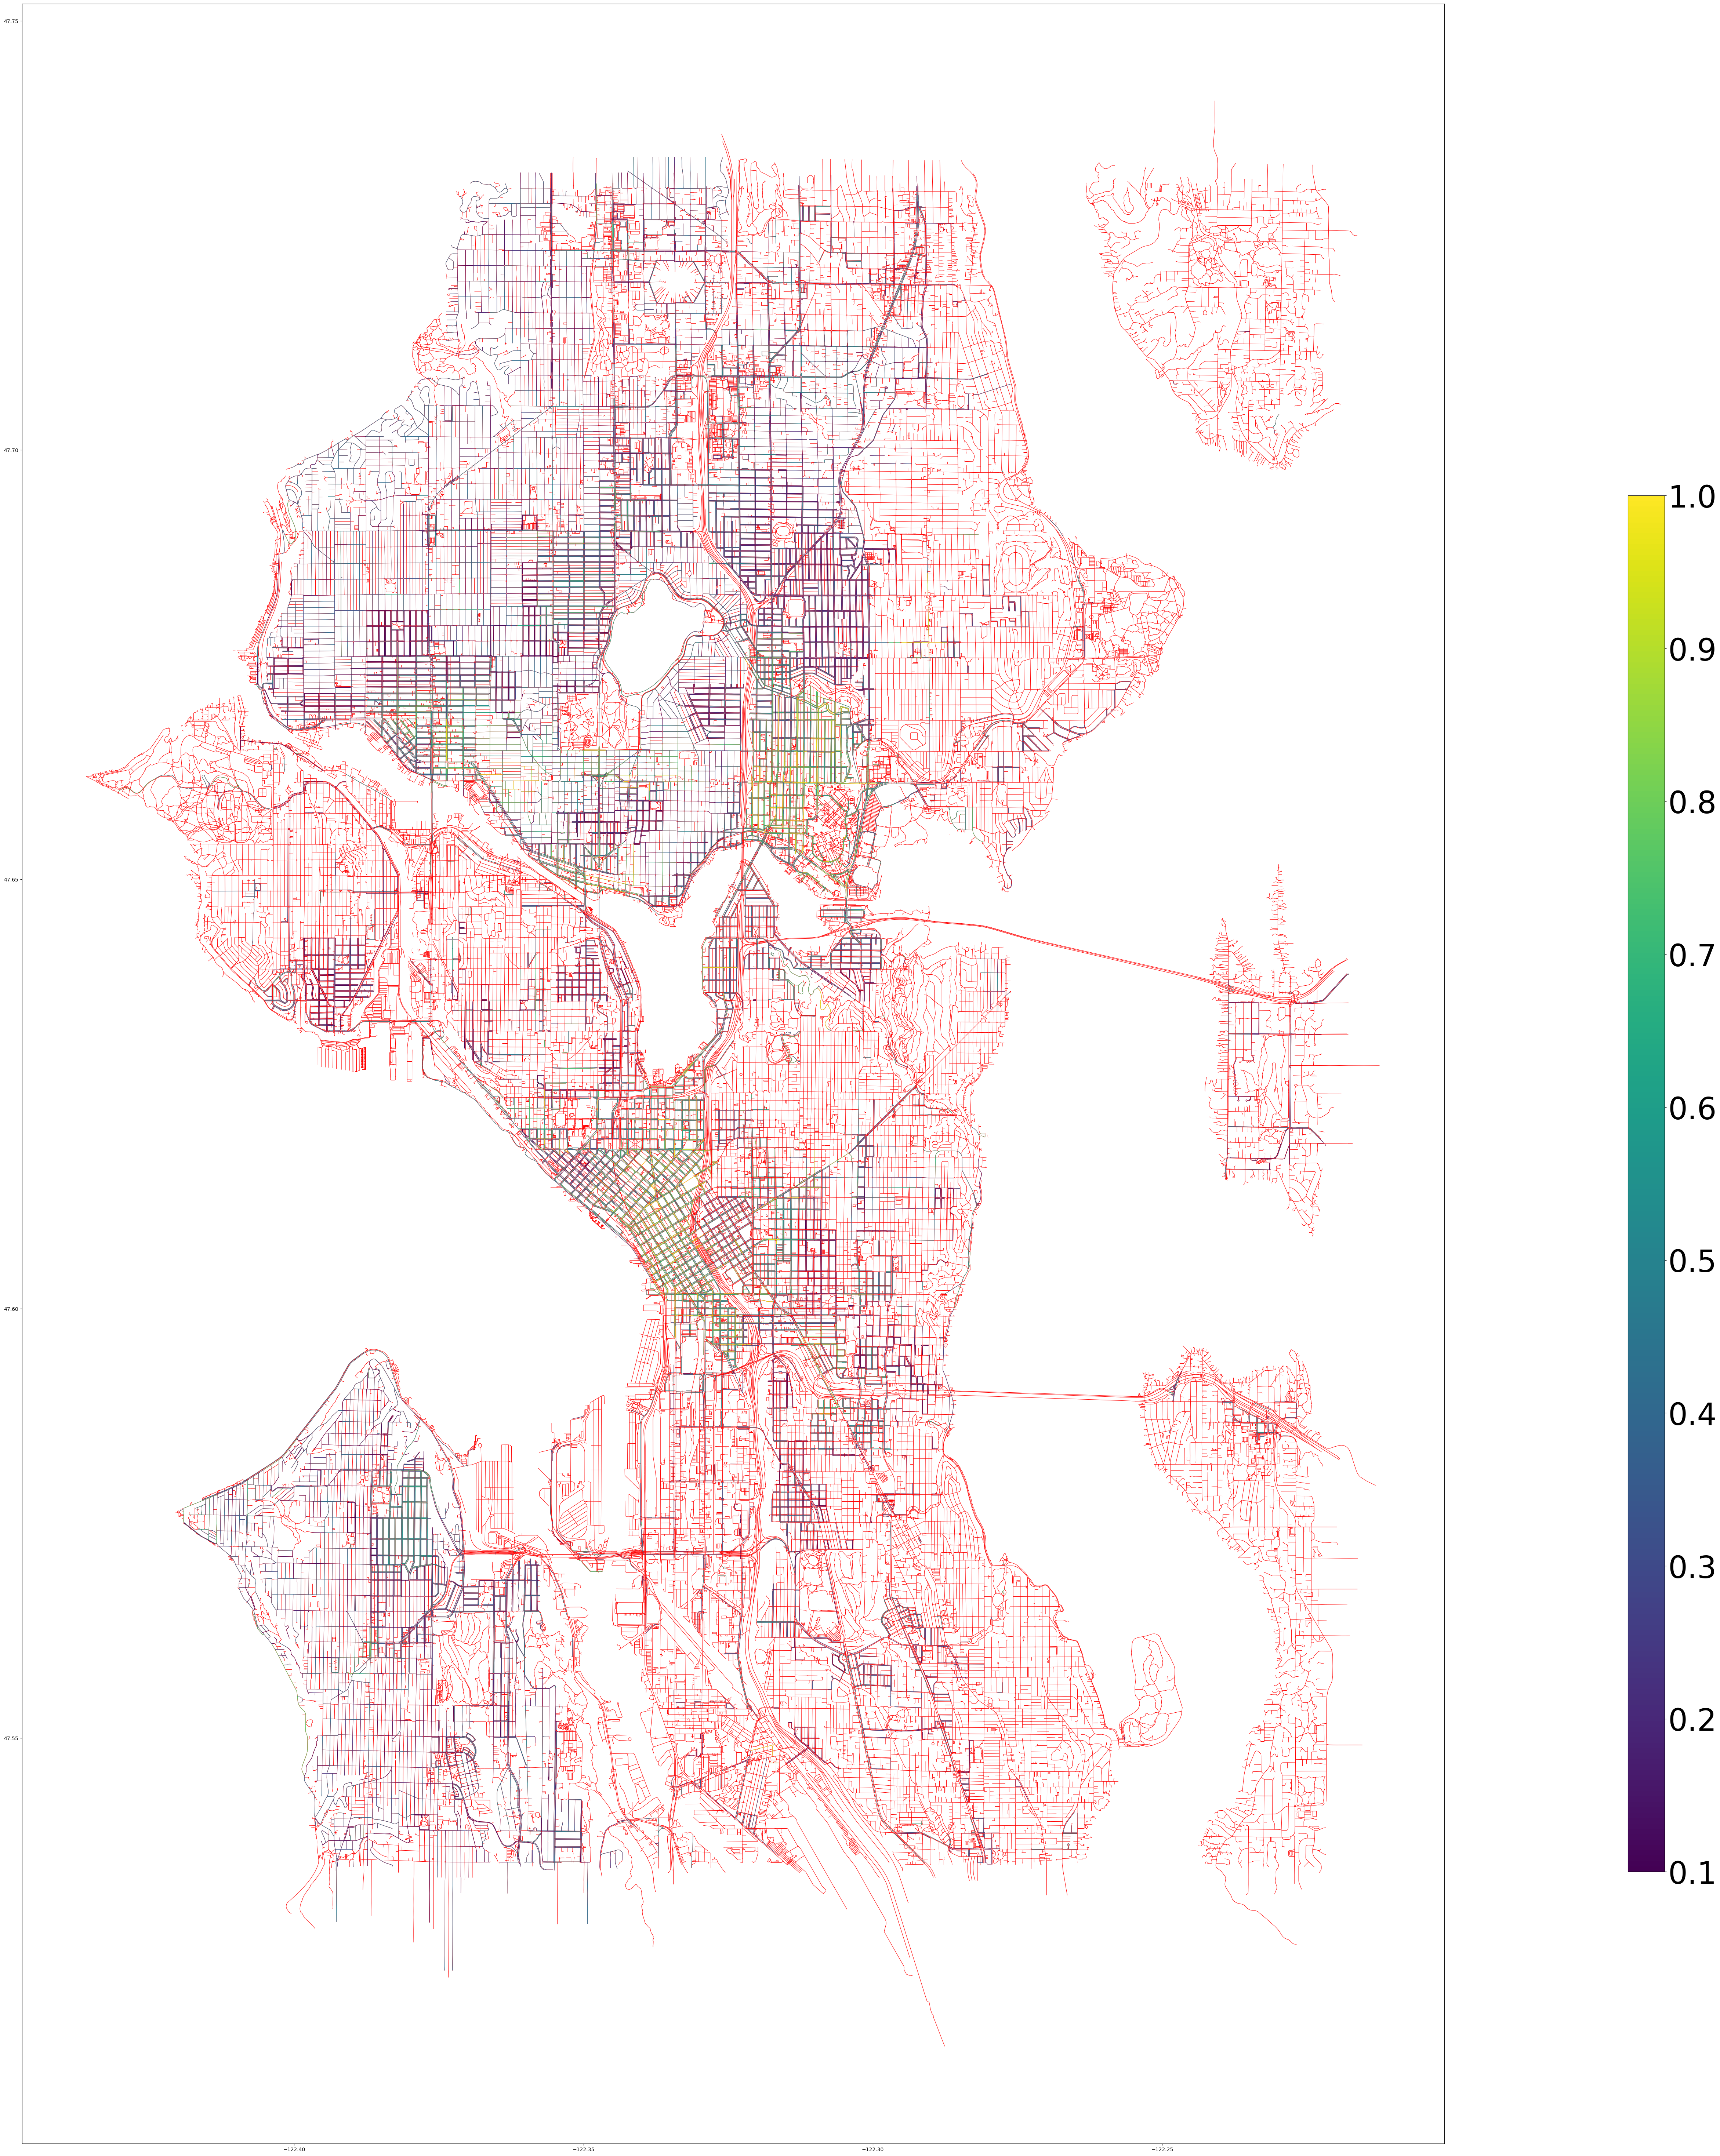

In [24]:
fig, ax = plt.subplots(figsize=(50,150))

highways.plot(color = 'red', lw = 0.75, ax=ax)
ax = result.plot(column = 'Trust', lw=0.75, ax=ax, cmap='viridis', legend = False)
# plt.legend(title="My Title", fontsize=5)
# plt.legend(prop = { 'size' : 30 })
# plt.savefig('data/sea_sidewalk.png', dpi=400)

fig = ax.get_figure()
cax = fig.add_axes([1, 0.35, 0.02, 0.25]) # 3rd -> width
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0.1, vmax=1))
sm._A = []
cbr = fig.colorbar(sm, cax=cax,)

cbr.ax.tick_params(labelsize=60) 
# plt.tight_layout()
ax.figure.savefig('data/plots/sea_sidewalk_trust.png', dpi=400)

plt.show()